In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('pima-indians-diabetes.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       768 non-null    int64  
 1   1       768 non-null    int64  
 2   2       768 non-null    int64  
 3   3       768 non-null    int64  
 4   4       768 non-null    int64  
 5   5       768 non-null    float64
 6   6       768 non-null    float64
 7   7       768 non-null    int64  
 8   8       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

In [7]:
df.describe()

,0,1,2,3,4,5,6,7,8
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
x=df.iloc[:,:7]
y=df.iloc[:,8:9]
print(x)
print(y)

      0    1   2   3    4     5      6
0     6  148  72  35    0  33.6  0.627
1     1   85  66  29    0  26.6  0.351
2     8  183  64   0    0  23.3  0.672
3     1   89  66  23   94  28.1  0.167
4     0  137  40  35  168  43.1  2.288
..   ..  ...  ..  ..  ...   ...    ...
763  10  101  76  48  180  32.9  0.171
764   2  122  70  27    0  36.8  0.340
765   5  121  72  23  112  26.2  0.245
766   1  126  60   0    0  30.1  0.349
767   1   93  70  31    0  30.4  0.315

[768 rows x 7 columns]
     8
0    1
1    0
2    1
3    0
4    1
..  ..
763  0
764  0
765  0
766  1
767  0

[768 rows x 1 columns]


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [15]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)

c:\python3.8\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [16]:
y_pred=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred))


0.7760416666666666


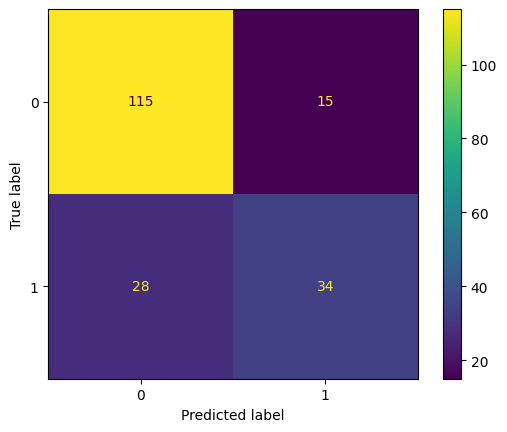

In [18]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       130
           1       0.69      0.55      0.61        62

    accuracy                           0.78       192
   macro avg       0.75      0.72      0.73       192
weighted avg       0.77      0.78      0.77       192



In [20]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [21]:
y_pred1=dtree.predict(x_test)
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       130
           1       0.55      0.58      0.57        62

    accuracy                           0.71       192
   macro avg       0.67      0.68      0.68       192
weighted avg       0.72      0.71      0.72       192



In [22]:
from sklearn.tree import plot_tree

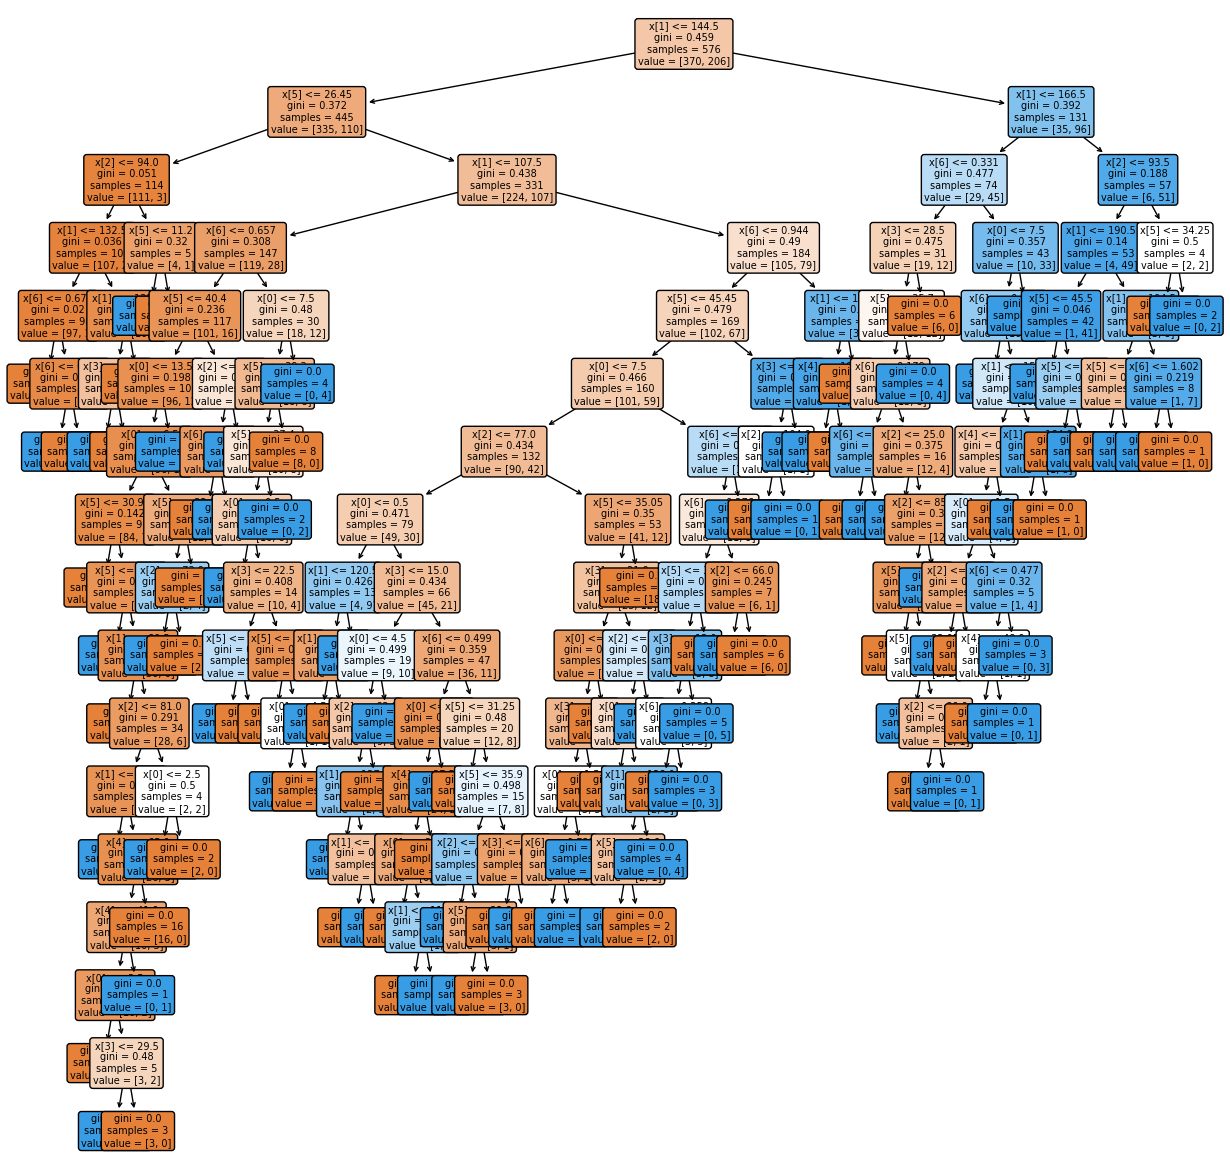

In [27]:
plt.figure(figsize=(15,15))
plot_tree(dtree,rounded=True,filled=True,fontsize=7)
plt.show()